In [1]:
import pretty_midi_fluidsynth as pmf
import librosa
import numpy as np

import librosa.display
import matplotlib.pyplot as plt

import soundfile as sf
import sounddevice as sd
from IPython.display import Audio

import io

# generate simple midi

In [2]:
cello_c_chord = pmf.PrettyMIDI()
print(f'{cello_c_chord=}')

cello_program = pmf.instrument_name_to_program('Cello')
print(f'{cello_program=}')

cello = pmf.Instrument(program=cello_program)
print(f'{cello=}')


for note_name in ['C5','E5','G5']:
    note_number = pmf.note_name_to_number(note_name)
    note = pmf.Note(velocity=100, pitch=note_number, start=0, end=1)
    cello.notes.append(note)
note = pmf.Note(velocity=100, pitch=0, start=0, end=1)
cello.notes.append(note)
note = pmf.Note(velocity=100, pitch=12, start=0, end=1)
cello.notes.append(note)
print(f'{note=}')

cello_c_chord.instruments.append(cello)
cello_c_chord.write('cello-C-chord.mid')

cello_c_chord=<pretty_midi_fluidsynth.pretty_midi.PrettyMIDI object at 0x000001B6512851C0>
cello_program=42
cello=Instrument(program=42, is_drum=False, name="")
note=Note(start=0.000000, end=1.000000, pitch=12, velocity=100)


# generate input data(contant-Q)

In [3]:
filename = "Flower_Dance.mid"
sr = 44100

In [4]:
midi_data = pmf.PrettyMIDI(filename)

## generate wave format

In [5]:
audio_data = midi_data.fluidsynth(
    sr,
#     sf2_path='MuseScore_General.sf3', # default : TimGM6mb.sf2
)

print(f"{audio_data.shape=}")
print(f"{audio_data.dtype=}")
print(f"{audio_data.max()=}")
print(f"{audio_data.min()=}")

audio_data.shape=(12298115,)
audio_data.dtype=dtype('float64')
audio_data.max()=0.9910656480642237
audio_data.min()=-1.0


In [6]:
# sd.play(audio_data,sr)

In [7]:
# sd.stop()

In [8]:
# Audio(data=audio_data, rate=sr)

## contant-Q transform

In [9]:
tempo, beat_frames = librosa.beat.beat_track(y=audio_data, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

hop_len = 512
freq_w = 3
octave = 8

C = librosa.cqt(
    audio_data, sr=sr,
    hop_length= hop_len,
    n_bins= 12*freq_w*octave,
    bins_per_octave= 12*freq_w
)

print(f"{C.shape=}")
print(f"{C.dtype=}")
print(f"{C.max()=}")
print(f"{C.min()=}")

C.shape=(288, 24020)
C.dtype=dtype('complex128')
C.max()=(12.586115165092792+1.287632503725584j)
C.min()=(-12.42250406238412-3.1976199242263403j)


In [11]:
c_power = np.abs(C)

print(f"{c_power.shape=}")
print(f"{c_power.dtype=}")
print(f"{c_power.max()=}")
print(f"{c_power.min()=}")

c_power.shape=(288, 24020)
c_power.dtype=dtype('float64')
c_power.max()=12.859378795772402
c_power.min()=3.469308291702192e-08


## EDA

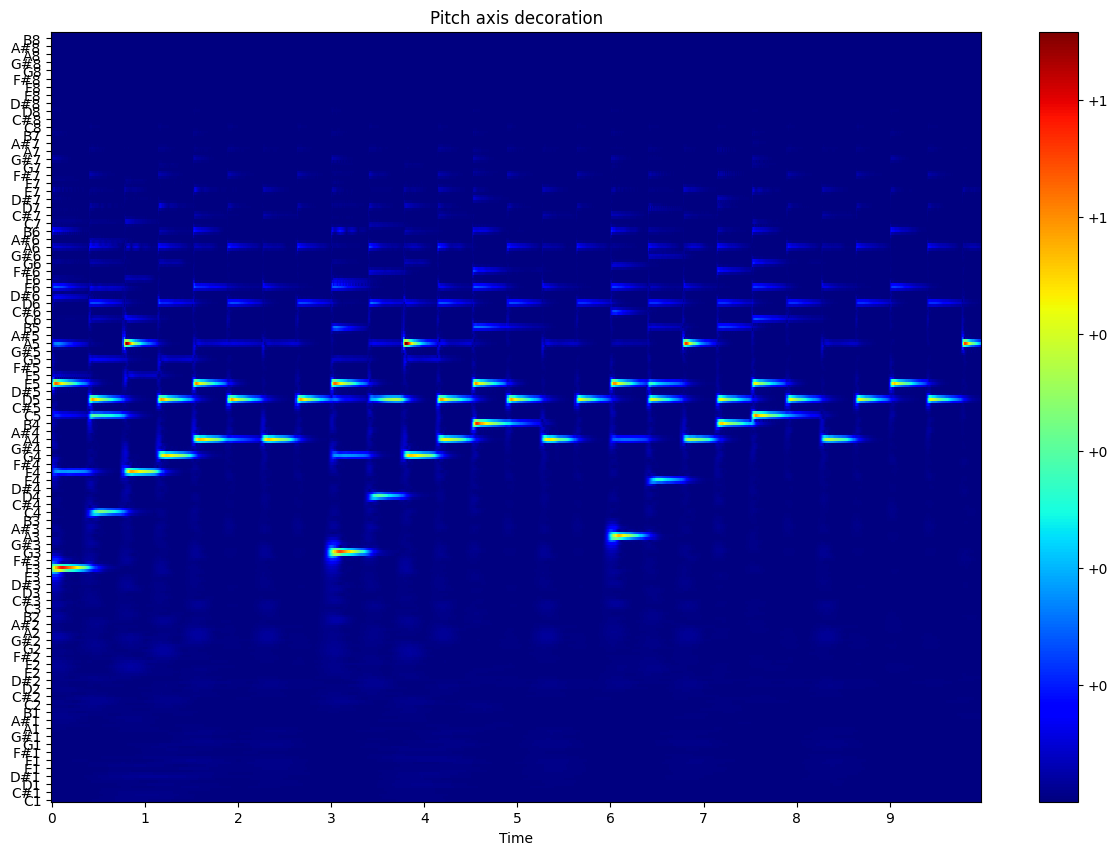

In [10]:
src = np.abs(C)

notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
y_ticks = np.arange(0,12*freq_w*octave,freq_w)
y_list=[]

for o in range(octave):
    for i in range(12):
        y_list.append(notes[i]+'%d'%(o+1))

plt.style.use('default')
fig, ax = plt.subplots(1,1,figsize=(15,10))
img = librosa.display.specshow(src[:,:sr//hop_len*10], sr=sr, x_axis='time', ax=ax, hop_length= hop_len, bins_per_octave= 12*freq_w,
                               cmap='jet'
                               )
ax.set(title='Pitch axis decoration')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_list)
fig.colorbar(img, ax=ax, format="%+2d")
# for i in beat_times:
#     ax.axvline(i,c='k')

plt.show()

# generate target data(piano roll)

In [11]:
fs = 100
piano_roll = midi_data.get_piano_roll(fs)

In [12]:
print(f"{piano_roll.shape=}")
print(f"{piano_roll.dtype=}")
print(f"{piano_roll.max()=}")
print(f"{piano_roll.min()=}")

piano_roll.shape=(128, 27786)
piano_roll.dtype=dtype('float64')
piano_roll.max()=380.0
piano_roll.min()=0.0


c:\Users\AI_server\miniconda3\envs\MA\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  return f(*args, **kwargs)


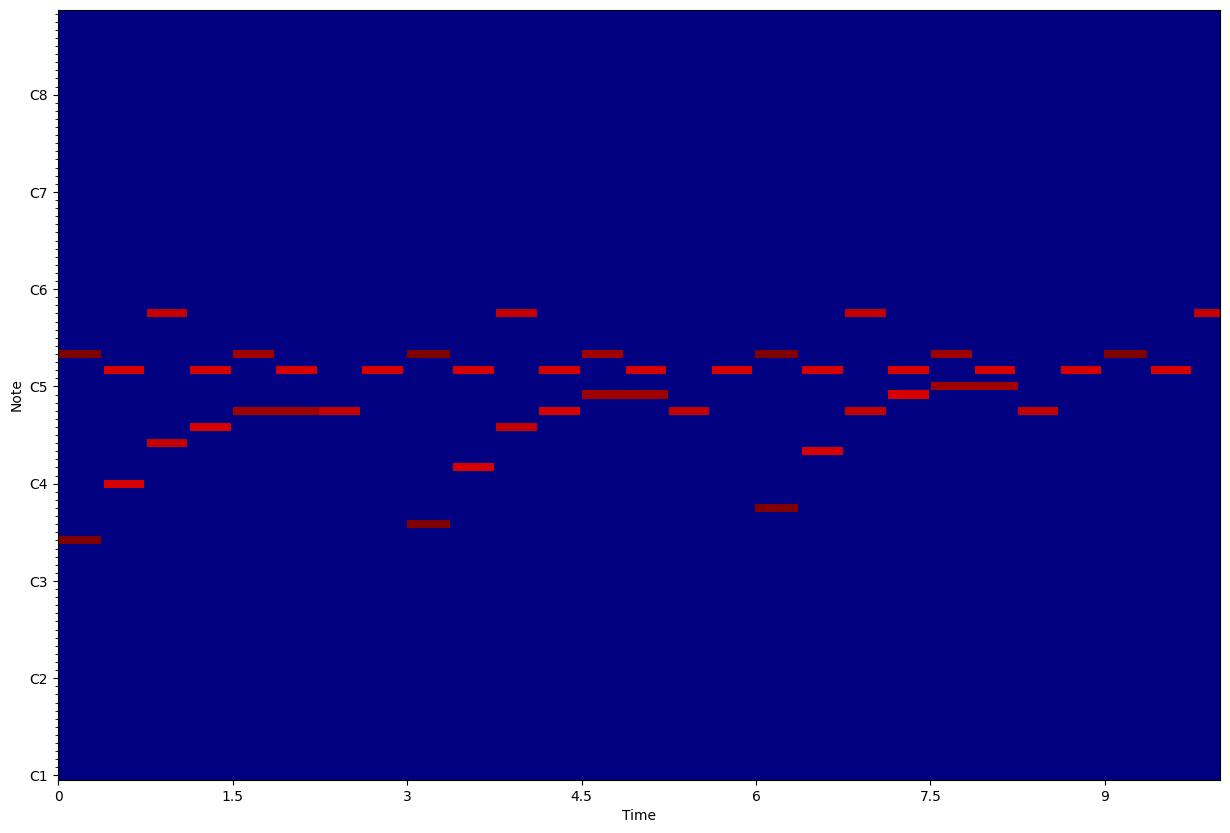

In [13]:
start_pitch = 24
end_pitch = 119

plt.figure(figsize=(15,10))
librosa.display.specshow(
    piano_roll[start_pitch:end_pitch,:fs*10],
    hop_length=1,
    sr=fs,
    x_axis='time',
    y_axis='cqt_note',
    cmap='jet',
    fmin=pmf.note_number_to_hz(start_pitch)
)
plt.show()

# change instrument

#### [Piano](/wiki/Piano "Piano")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=4 "Edit section: Piano")\]

*   1 [Acoustic Grand Piano](/wiki/Grand_piano "Grand piano")
*   2 [Bright](/wiki/Timbre#brightness "Timbre") Acoustic Piano
*   3 [Electric Grand Piano](/wiki/Electric_grand_piano "Electric grand piano")
*   4 [Honky-tonk Piano](/wiki/Tack_piano "Tack piano")
*   5 [Electric Piano](/wiki/Electric_Piano "Electric Piano") 1 (usually a [Rhodes Piano](/wiki/Rhodes_Piano "Rhodes Piano"))
*   6 [Electric Piano](/wiki/Electric_Piano "Electric Piano") 2 (usually an [FM piano patch](/wiki/FM_synthesis "FM synthesis"))
*   7 [Harpsichord](/wiki/Harpsichord "Harpsichord")
*   8 [Clavinet](/wiki/Clavinet "Clavinet")

#### [Chromatic Percussion](/wiki/Pitched_percussion_instrument "Pitched percussion instrument")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=5 "Edit section: Chromatic Percussion")\]

*   9 [Celesta](/wiki/Celesta "Celesta")
*   10 [Glockenspiel](/wiki/Glockenspiel "Glockenspiel")
*   11 [Music Box](/wiki/Music_box "Music box")
*   12 [Vibraphone](/wiki/Vibraphone "Vibraphone")
*   13 [Marimba](/wiki/Marimba "Marimba")
*   14 [Xylophone](/wiki/Xylophone "Xylophone")
*   15 [Tubular Bells](/wiki/Tubular_bell "Tubular bell")
*   16 [Dulcimer](/wiki/Hammered_dulcimer "Hammered dulcimer")

#### [Organ](/wiki/Organ_(music) "Organ (music)")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=6 "Edit section: Organ")\]

*   17 [Drawbar Organ](/wiki/Hammond_organ "Hammond organ")
*   18 [Percussive Organ](/wiki/Hammond_organ#Harmonic_percussion "Hammond organ")
*   19 [Rock Organ](/wiki/Hammond_organ#Leslie_speaker "Hammond organ")
*   20 [Church Organ](/wiki/Pipe_organ "Pipe organ")
*   21 [Reed Organ](/wiki/Pump_organ "Pump organ")
*   22 [Accordion](/wiki/Accordion "Accordion")
*   23 [Harmonica](/wiki/Harmonica "Harmonica")
*   24 [Tango Accordion](/wiki/Bandone%C3%B3n "Bandoneón")

#### [Guitar](/wiki/Guitar "Guitar")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=7 "Edit section: Guitar")\]

*   25 [Acoustic Guitar (_nylon_)](/wiki/Classical_guitar "Classical guitar")
*   26 [Acoustic Guitar (_steel_)](/wiki/Steel-string_acoustic_guitar "Steel-string acoustic guitar")
*   27 [Electric Guitar (_jazz_)](/wiki/Jazz_guitar "Jazz guitar")
*   28 [Electric Guitar](/wiki/Electric_guitar "Electric guitar") (_clean_)
*   29 Electric Guitar (_[muted](/wiki/Palm_mute "Palm mute")_)
*   30 Electric Guitar (_[overdriven](/wiki/Fuzzbox "Fuzzbox")_)
*   31 Electric Guitar (_[distortion](/wiki/Fuzzbox "Fuzzbox")_)
*   32 Electric Guitar (_[harmonics](/wiki/String_harmonic#Pinch_harmonics "String harmonic")_)

#### [Bass](/wiki/Bass_(instrument) "Bass (instrument)")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=8 "Edit section: Bass")\]

*   33 [Acoustic Bass](/wiki/Acoustic_bass_guitar "Acoustic bass guitar")
*   34 [Electric Bass](/wiki/Bass_guitar "Bass guitar") (_[finger](/wiki/Pizzicato "Pizzicato")_)
*   35 Electric Bass (_[picked](/wiki/Plectrum "Plectrum")_)
*   36 [Fretless Bass](/wiki/Bass_guitar#Fretless_bass_guitars "Bass guitar")
*   37 [Slap Bass](/wiki/Slapping_(music) "Slapping (music)") 1
*   38 Slap Bass 2
*   39 [Synth Bass](/wiki/Keyboard_bass "Keyboard bass") 1
*   40 Synth Bass 2

#### [Strings](/wiki/String_(music) "String (music)")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=9 "Edit section: Strings")\]

*   41 [Violin](/wiki/Violin "Violin")
*   42 [Viola](/wiki/Viola "Viola")
*   43 [Cello](/wiki/Cello "Cello")
*   44 [Contrabass](/wiki/Double_bass "Double bass")
*   45 [Tremolo Strings](/wiki/Tremolo "Tremolo")
*   46 [Pizzicato Strings](/wiki/Pizzicato#bowed_string_instrument_technique "Pizzicato")
*   47 [Orchestral Harp](/wiki/Pedal_harp "Pedal harp")
*   48 [Timpani](/wiki/Timpani "Timpani")

#### [Ensemble](/wiki/Musical_ensemble "Musical ensemble")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=10 "Edit section: Ensemble")\]

*   49 [String Ensemble](/wiki/String_section "String section") 1
*   50 String Ensemble 2
*   51 [Synth Strings](/wiki/String_synthesizer "String synthesizer") 1
*   52 Synth Strings 2
*   53 [Choir](/wiki/Choir "Choir") [Aahs](/wiki/Open_central_unrounded_vowel "Open central unrounded vowel")
*   54 [Voice](/wiki/Human_voice "Human voice") [Oohs](/wiki/Close_back_rounded_vowel "Close back rounded vowel") (or _[Doos](/wiki/Voiced_dental_stop "Voiced dental stop")_)
*   55 [Synth Voice](/wiki/Speech_synthesis "Speech synthesis") _or_ [Solo](/wiki/Solo_(music) "Solo (music)") Vox
*   56 [Orchestra Hit](/wiki/Orchestra_hit "Orchestra hit")

#### [Brass](/wiki/Brass_instrument "Brass instrument")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=11 "Edit section: Brass")\]

*   57 [Trumpet](/wiki/Trumpet "Trumpet")
*   58 [Trombone](/wiki/Trombone "Trombone")
*   59 [Tuba](/wiki/Tuba "Tuba")
*   60 [Muted Trumpet](/wiki/Mute_(music) "Mute (music)")
*   61 [French Horn](/wiki/French_Horn "French Horn")
*   62 [Brass Section](/wiki/Brass_Section "Brass Section")
*   63 [Synth](/wiki/Synthesizer "Synthesizer") Brass 1
*   64 Synth Brass 2

#### [Reed](/wiki/Reed_aerophone "Reed aerophone")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=12 "Edit section: Reed")\]

*   65 [Soprano Sax](/wiki/Soprano_saxophone "Soprano saxophone")
*   66 [Alto Sax](/wiki/Alto_saxophone "Alto saxophone")
*   67 [Tenor Sax](/wiki/Tenor_saxophone "Tenor saxophone")
*   68 [Baritone Sax](/wiki/Baritone_saxophone "Baritone saxophone")
*   69 [Oboe](/wiki/Oboe "Oboe")
*   70 [English Horn](/wiki/Cor_anglais "Cor anglais")
*   71 [Bassoon](/wiki/Bassoon "Bassoon")
*   72 [Clarinet](/wiki/Clarinet "Clarinet")

#### [Pipe](/wiki/Aerophone "Aerophone")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=13 "Edit section: Pipe")\]

*   73 [Piccolo](/wiki/Piccolo "Piccolo")
*   74 [Flute](/wiki/Western_concert_flute "Western concert flute")
*   75 [Recorder](/wiki/Recorder_(musical_instrument) "Recorder (musical instrument)")
*   76 [Pan Flute](/wiki/Pan_Flute "Pan Flute")
*   77 [Blown bottle](/wiki/Blown_bottle "Blown bottle")
*   78 [Shakuhachi](/wiki/Shakuhachi "Shakuhachi")
*   79 [Whistle](/wiki/Tin_whistle "Tin whistle")
*   80 [Ocarina](/wiki/Ocarina "Ocarina")

#### [Synth](/wiki/Synthesizer "Synthesizer") [Lead](/wiki/Lead_instrument "Lead instrument")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=14 "Edit section: Synth Lead")\]

*   81 [Lead](/wiki/Synthesizer "Synthesizer") 1 ([square](/wiki/Square_wave "Square wave"))
*   82 Lead 2 (_[sawtooth](/wiki/Sawtooth_wave "Sawtooth wave")_)
*   83 Lead 3 (_[calliope](/wiki/Calliope_(music) "Calliope (music)")_)
*   84 Lead 4 (_[chiff](/wiki/Blown_bottle "Blown bottle")_)
*   85 Lead 5 (_charang_, a guitar-like lead)
*   86 Lead 6 (_space [voice](/wiki/Human_voice "Human voice")_)
*   87 Lead 7 (_[fifths](/wiki/Perfect_fifth "Perfect fifth")_)
*   88 Lead 8 (_bass and lead_)

#### [Synth Pad](/wiki/Synth_pad "Synth pad")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=15 "Edit section: Synth Pad")\]

*   89 Pad 1 (_[new age](/wiki/New-age_music "New-age music")_ or _[fantasia](/wiki/Fantasy "Fantasy")_, a warm pad stacked with a [bell](/wiki/Bell "Bell"))
*   90 Pad 2 (_warm_)
*   91 Pad 3 (_polysynth_ or _[poly](/wiki/Polyphony "Polyphony")_)
*   92 Pad 4 (_[choir](/wiki/Choir "Choir")_)
*   93 Pad 5 (_[bowed glass](/wiki/Glass_harmonica "Glass harmonica")_ or _[bowed](/wiki/Bow_(music) "Bow (music)")_)
*   94 Pad 6 (_metallic_)
*   95 Pad 7 (_halo_)
*   96 Pad 8 (_[sweep](/wiki/Auto-wah "Auto-wah")_)

#### [Synth Effects](/wiki/Synthesizer "Synthesizer")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=16 "Edit section: Synth Effects")\]

*   97 FX 1 (_[rain](/wiki/Rain "Rain")_)
*   98 FX 2 (_[soundtrack](/wiki/Soundtrack "Soundtrack")_, a bright perfect fifth pad)
*   99 FX 3 (_[crystal](/wiki/Crystallophone "Crystallophone")_)
*   100 FX 4 (_atmosphere_, usually a [nylon](/wiki/Classical_guitar "Classical guitar")\-like sound)
*   101 FX 5 (_[brightness](/wiki/Timbre#Brightness "Timbre")_)
*   102 FX 6 (_[goblins](/wiki/Goblin "Goblin")_)
*   103 FX 7 (_[echoes](/wiki/Echo "Echo")_ or _echo [drops](/wiki/Droplet "Droplet")_)
*   104 FX 8 (_[sci-fi](/wiki/Science_fiction "Science fiction")_ or _star theme_)

#### [Ethnic](/wiki/World_music "World music")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=17 "Edit section: Ethnic")\]

*   105 [Sitar](/wiki/Sitar "Sitar")
*   106 [Banjo](/wiki/Banjo "Banjo")
*   107 [Shamisen](/wiki/Shamisen "Shamisen")
*   108 [Koto](/wiki/Koto_(musical_instrument) "Koto (musical instrument)")
*   109 [Kalimba](/wiki/Kalimba "Kalimba")
*   110 [Bag pipe](/wiki/Bagpipes "Bagpipes")
*   111 [Fiddle](/wiki/Fiddle "Fiddle")
*   112 [Shanai](/wiki/Shehnai "Shehnai")

#### [Percussive](/wiki/Percussion_instrument "Percussion instrument")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=18 "Edit section: Percussive")\]

*   113 [Tinkle Bell](/wiki/Wind_chime "Wind chime")
*   114 [Agogô](/wiki/Agog%C3%B4 "Agogô")
*   115 [Steel Drums](/wiki/Steelpan "Steelpan")
*   116 [Woodblock](/wiki/Woodblock_(instrument) "Woodblock (instrument)")
*   117 [Taiko Drum](/wiki/Taiko "Taiko")
*   118 [Melodic Tom](/wiki/Tom-tom_drum "Tom-tom drum") _or_ [808](/wiki/Roland_TR-808 "Roland TR-808") Toms
*   119 [Synth Drum](/wiki/Electronic_drum "Electronic drum")
*   120 [Reverse Cymbal](/wiki/Suspended_cymbal "Suspended cymbal")

#### [Sound Effects](/wiki/Sound_effect "Sound effect")\[[edit](/w/index.php?title=General_MIDI&action=edit&section=19 "Edit section: Sound Effects")\]

*   121 [Guitar](/wiki/Guitar "Guitar") [Fret](/wiki/Fret "Fret") Noise
*   122 [Breath](/wiki/Breathing "Breathing") Noise
*   123 [Seashore](/wiki/Coast "Coast")
*   124 [Bird Tweet](/wiki/Bird_vocalisation "Bird vocalisation")
*   125 [Telephone Ring](/wiki/Ring_(telephone) "Ring (telephone)")
*   126 [Helicopter](/wiki/Helicopter "Helicopter")
*   127 [Applause](/wiki/Applause "Applause")
*   128 [Gunshot](/wiki/Muzzle_blast#Gun_sound "Muzzle blast")

In [14]:
for idx, instr in enumerate(midi_data.instruments):
    print(idx,instr)

0 Instrument(program=71, is_drum=False, name="Clarinet in Bb")
1 Instrument(program=60, is_drum=False, name="Horn in F")
2 Instrument(program=73, is_drum=False, name="Flute")
3 Instrument(program=40, is_drum=False, name="Violin I")
4 Instrument(program=40, is_drum=False, name="Violin II")
5 Instrument(program=41, is_drum=False, name="Viola")
6 Instrument(program=42, is_drum=False, name="Cello")
7 Instrument(program=45, is_drum=False, name="Cello")
8 Instrument(program=0, is_drum=True, name="Drum Set")
9 Instrument(program=0, is_drum=False, name="Piano")


In [15]:
type(midi_data.instruments)

list

In [16]:
print(dir(midi_data.instruments[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'control_changes', 'fluidsynth', 'get_chroma', 'get_end_time', 'get_onsets', 'get_piano_roll', 'get_pitch_class_histogram', 'get_pitch_class_transition_matrix', 'is_drum', 'name', 'notes', 'pitch_bends', 'program', 'remove_invalid_notes', 'synthesize']


In [17]:
print(pmf.constants.INSTRUMENT_MAP)

['Acoustic Grand Piano', 'Bright Acoustic Piano', 'Electric Grand Piano', 'Honky-tonk Piano', 'Electric Piano 1', 'Electric Piano 2', 'Harpsichord', 'Clavinet', 'Celesta', 'Glockenspiel', 'Music Box', 'Vibraphone', 'Marimba', 'Xylophone', 'Tubular Bells', 'Dulcimer', 'Drawbar Organ', 'Percussive Organ', 'Rock Organ', 'Church Organ', 'Reed Organ', 'Accordion', 'Harmonica', 'Tango Accordion', 'Acoustic Guitar (nylon)', 'Acoustic Guitar (steel)', 'Electric Guitar (jazz)', 'Electric Guitar (clean)', 'Electric Guitar (muted)', 'Overdriven Guitar', 'Distortion Guitar', 'Guitar Harmonics', 'Acoustic Bass', 'Electric Bass (finger)', 'Electric Bass (pick)', 'Fretless Bass', 'Slap Bass 1', 'Slap Bass 2', 'Synth Bass 1', 'Synth Bass 2', 'Violin', 'Viola', 'Cello', 'Contrabass', 'Tremolo Strings', 'Pizzicato Strings', 'Orchestral Harp', 'Timpani', 'String Ensemble 1', 'String Ensemble 2', 'Synth Strings 1', 'Synth Strings 2', 'Choir Aahs', 'Voice Oohs', 'Synth Choir', 'Orchestra Hit', 'Trumpet', '

In [18]:
print(pmf.constants.INSTRUMENT_CLASSES)

['Piano', 'Chromatic Percussion', 'Organ', 'Guitar', 'Bass', 'Strings', 'Ensemble', 'Brass', 'Reed', 'Pipe', 'Synth Lead', 'Synth Pad', 'Synth Effects', 'Ethnic', 'Percussive', 'Sound Effects']


In [19]:
num = 73
instr_name = pmf.program_to_instrument_name(num)
print(f"{type(instr_name)=}")
print(f"{num} - {instr_name=}")
instr_program_num = pmf.instrument_name_to_program(instr_name)
print(f"{type(instr_program_num)=}")
print(f"{instr_name} - {instr_program_num=}")

type(instr_name)=<class 'str'>
73 - instr_name='Flute'
type(instr_program_num)=<class 'int'>
Flute - instr_program_num=73


In [20]:
midi_data.instruments[0].program = instr_program_num
midi_data.instruments[0].name = instr_name
midi_data.instruments[0].is_drum = False
midi_data.instruments[0]

Instrument(program=73, is_drum=False, name="Flute")

In [21]:
for idx, instr in enumerate(midi_data.instruments):
    print(idx,instr)

0 Instrument(program=73, is_drum=False, name="Flute")
1 Instrument(program=60, is_drum=False, name="Horn in F")
2 Instrument(program=73, is_drum=False, name="Flute")
3 Instrument(program=40, is_drum=False, name="Violin I")
4 Instrument(program=40, is_drum=False, name="Violin II")
5 Instrument(program=41, is_drum=False, name="Viola")
6 Instrument(program=42, is_drum=False, name="Cello")
7 Instrument(program=45, is_drum=False, name="Cello")
8 Instrument(program=0, is_drum=True, name="Drum Set")
9 Instrument(program=0, is_drum=False, name="Piano")


In [22]:
audio_data = midi_data.fluidsynth(
    sr,
#     sf2_path='MuseScore_General.sf3', # default : TimGM6mb.sf2
)

In [23]:
# Audio(data=audio_data, rate=sr)